# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Rachmad Hidayat]
- **Email:** [dayaat369@gmail.com]
- **ID Dicoding:** [dayat369]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan di platform e-commerce selama periode waktu tertentu?
- Produk apa yang paling banyak dan sedikit terjual?
- Bagaimana demografi pelanggan yang kita miliki?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Importting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install streamlit
import streamlit as st

  You can safely remove it manually.


  Using cached streamlit-1.39.0-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached blinker-1.8.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached protobuf-5.28.2-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached pyarrow-17.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached watchdog-5.0.3-py3-none-win_amd64.whl.metadata (41 kB)
  Using cached gitdb-4.0.11-py3-none-any

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('/content/customers_dataset.csv')
customers_df.head()


FileNotFoundError: [Errno 2] No such file or directory: '/content/customers_dataset.csv'

In [ ]:
order_items_df = pd.read_csv('/content/order_items_dataset.csv')
order_items_df.head()

In [6]:
order_payments_df = pd.read_csv('/content/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews_df = pd.read_csv('/content/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
orders_df = pd.read_csv('/content/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
product_category_df = pd.read_csv('/content/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
products_df = pd.read_csv('/content/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df = pd.read_csv('/content/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
geolocation_df = pd.read_csv('/content/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Insight:**
- xxx
- xxx

### Assessing Data

In [13]:
customers_df.info()
# find missing values
customers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [14]:
# find the number of duplicates
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
# check statistical parameters
customers_df.describe(include="all")

Jumlah duplikasi:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
tidak ada masalah dengan tipe data dari seluruh kolom tersebut

In [15]:
order_items_df.info()
# find missing values
order_items_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [16]:
# find the number of duplicates
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
# check statistical parameters
order_items_df.describe(include="all")

Jumlah duplikasi:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Insight:**
kolom shipping_limit_date seharusnya direpresentasikan sebagai tipe data datetime

In [17]:
order_payments_df.info()
# find missing values
order_payments_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [18]:
# find the number of duplicates
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
# check statistical parameters
order_payments_df.describe(include="all")

Jumlah duplikasi:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
tidak ada masalah dengan tipe data dari seluruh kolom tersebut

In [19]:
order_reviews_df.info()
# find missing values
order_reviews_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [20]:
# find the number of duplicates
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
# check statistical parameters
order_reviews_df.describe(include="all")

Jumlah duplikasi:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Insight:**
- terdapat 87656 missing values pada kolom review_comment title
- terdapat 58247 missing values pada kolom review_comment_message
- kolom review_creation_date seharusnya direpresentasikan sebagai tipe data datetime

In [21]:
orders_df.info()
# find missing values
orders_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [22]:
# find the number of duplicates
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
# check statistical parameters
orders_df.describe(include="all")

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**insight**:
- terdapat 160 missing values pada kolom order_approved_at
- terdapat 1783 missing values pada kolom order_delivered_carrier
- terdapat 2965 missing values pada kolom order_delivered_customer
- beberapa kolom seharusnya direpresentasikan sebagai tipe data datetime


In [23]:
product_category_df.info()
# find missing values
product_category_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,0
product_category_name,0
product_category_name_english,0


In [24]:
# find the number of duplicates
print("Jumlah duplikasi: ", product_category_df.duplicated().sum())
# check statistical parameters
product_category_df.describe(include="all")

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
tidak ada masalah dengan tipe data dari seluruh kolom tersebut

In [25]:
products_df.info()
# find missing values
products_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [26]:
# find the number of duplicates
print("Jumlah duplikasi: ", products_df.duplicated().sum())
# check statistical parameters
products_df.describe(include="all")

Jumlah duplikasi:  0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight**:
- terdapat 610 missing values pada 4 kolom
- terdapat 2 missing values pada 4 kolom

In [27]:
sellers_df.info()
# find missing values
sellers_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [28]:
# find the number of duplicates
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
# check statistical parameters
sellers_df.describe(include="all")

Jumlah duplikasi:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
tidak ada masalah dengan tipe data dari seluruh kolom tersebut

In [29]:
geolocation_df.info()
# find missing values
geolocation_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [30]:
# find the number of duplicates
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())
# check statistical parameters
geolocation_df.describe(include="all")

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


**Insight**:
terdapat 261831 duplikasi data

**Conclusion of Assessing Data**:

Terdapat masalah pada kolom:
- order_items
- order_reviews
- orders
- products
- geolocation

### Cleaning Data

#### order_items

In [31]:
# change the data type in column shipping_limit_date to datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [32]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### order_reviews

In [33]:
# handling missing values
order_reviews_df.dropna(subset=['review_comment_title', 'review_comment_message'], inplace=True)

In [34]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


In [35]:
# change the data type in column review_creation_date to datetime
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])

In [36]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 9 to 99200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                9839 non-null   object        
 1   order_id                 9839 non-null   object        
 2   review_score             9839 non-null   int64         
 3   review_comment_title     9839 non-null   object        
 4   review_comment_message   9839 non-null   object        
 5   review_creation_date     9839 non-null   datetime64[ns]
 6   review_answer_timestamp  9839 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 614.9+ KB


#### orders

In [37]:
# handling missing values
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [38]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [39]:
# change the data type to datetime
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [40]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### products

In [41]:
# handling missing values
products_df.dropna(subset=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [42]:
products_df.isna().sum()

,0
product_id,0
product_category_name,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


#### geolocation

In [43]:
# remove duplicate data
geolocation_df.drop_duplicates(inplace=True)

In [44]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


## Exploratory Data Analysis (EDA)

### Explore **customers_df**

In [45]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6185,5b316feca7e939c2199a4ee7223e2f51,8797ab21284e4c29f9b4661f05b52da2,45400,valenca,BA
49383,5d4c3dec83cf419913cd93b34811d37f,d4d2b2503ca73b1af35b03aa2d08a087,37200,lavras,MG
98416,c55355e7b977437c0e3bd30e169b66c2,ae3874e39dcedb5abcf8ec6c24e51bb8,57071,maceio,AL
90276,0e97ad6542c12412f0324dd07cb0daed,eb28bff08568a482c92be706965131b6,1503,sao paulo,SP
92737,efc4c623964e15c1c247a2b21e79aab5,a15839b3f86a500d47e1a5edc37b33f3,75800,jatai,GO


In [46]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [47]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore **order_payments_df**

In [48]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
94463,03b93d42401e436cb00a2dd82a3975f7,1,credit_card,2,51.50
80964,0b75da0be2772eb19f522706b2078530,1,credit_card,1,38.51
99115,12d5f23ba1e52d7174d5d15c96972401,1,boleto,1,55.65
12684,27e2a7e5ef6ee74e734f296c3a0e33f8,1,credit_card,2,24.95
97513,698c42d4d45a628919b9b38241aebf4a,1,credit_card,5,418.92


In [49]:
order_payments_df.groupby(by="payment_type").payment_value.sum().sort_values(ascending=False)

,payment_value
payment_type,
credit_card,12542084.19
boleto,2869361.27
voucher,379436.87
debit_card,217989.79
not_defined,0.00


In [50]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### Explore **orders_df**

In [51]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
59289,482e206fff82661add35d3aeab19fd93,22751df9d8e0530108d0997313791666,delivered,2018-07-14 15:26:48,2018-07-17 07:31:30,2018-07-18 15:16:00,2018-07-23 14:26:49,2018-08-01
86397,758888bc05afa2d25b8ebd3c47020016,20f090cdeeda1b2c7028fd2d2b7ff9d4,delivered,2018-04-17 18:36:27,2018-04-17 18:51:36,2018-04-19 19:36:43,2018-05-04 17:20:52,2018-05-15
83161,5aea0e32c93560d6e8235be9954aba01,cd6042c2aa18ffe499a2bd2bbadc0c41,delivered,2018-03-09 20:09:13,2018-03-09 20:48:15,2018-03-12 23:39:58,2018-04-18 22:56:41,2018-04-24
3853,d455a8b19923a717a1d1cfb67604e8c6,2e09a0d6a340c17e302b200c2194b39f,delivered,2017-04-18 23:11:46,2017-04-18 23:25:16,2017-04-20 16:21:40,2017-04-30 09:23:56,2017-05-08
17467,45281486033aa1a5fb951a3cb2105e29,ac90d04814ce655c507c4d043e27a891,delivered,2018-02-14 23:23:43,2018-02-16 14:30:51,2018-02-15 19:29:01,2018-02-17 17:19:06,2018-03-01


In [52]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [53]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
11438,68ad0ebee3a67c4fac46dd25a0008850,7a0d24a923461137d9a823de95b5c102,delivered,2017-12-07 13:02:57,2017-12-07 15:10:12,2017-12-11 14:18:11,2017-12-20 22:52:41,2018-01-04,9.0
77197,3a22a67fdde9c599b722069b9725a709,cf5f72dc3581d0f4f8f697f2ab6f0f6a,delivered,2017-05-28 21:43:41,2017-05-30 04:45:22,2017-05-30 16:28:04,2017-06-05 15:55:57,2017-06-27,6.0
94141,c88935c0144ef18368420018e18f177a,ee7e21c28d1a65571f31b635723bbd4a,delivered,2018-08-11 22:11:28,2018-08-11 22:25:13,2018-08-13 12:23:00,2018-08-27 16:32:13,2018-09-05,14.0
19311,a56949479e3d5637c235d6d58740fee3,1be54c519a370b37153695f60e7c94b2,delivered,2018-05-10 12:06:02,2018-05-11 03:50:29,2018-05-11 15:05:00,2018-05-16 23:52:02,2018-05-30,5.0
9247,459753b1d2402ab3f8eab4f908129043,8fab651496bcc30fd97ec67048600c27,delivered,2017-11-24 13:41:16,2017-11-24 15:53:59,2017-11-28 17:57:08,2017-12-12 23:34:11,2017-12-15,14.0


In [54]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,9.292429
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,-16.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,12.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,205.000000


### Explore **orders_df & customers_df**

In [55]:
customer_id_in_orders_df = orders_df["customer_id"].unique() # Extract unique customer IDs from orders_df
customer_id_in_orders_df = set(customer_id_in_orders_df) # Convert to a set for faster lookups
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
53632,67ec30c3644befcf17d88bff9f9fd1a5,9b73fc3f0ec886a6d9801d8d90023653,70737,brasilia,DF,Active
62534,ac273047ab37c8e54e6622c2a58ccdf3,45803b22a4915496b505713dd352e779,20261,rio de janeiro,RJ,Active
25571,492ed17eccb0e4776b3654a1b7336175,dee8da46afbf927c657ca0a55b93c218,57055,maceio,AL,Active
8717,ccbd5f3c7f46b8833facd60c6a4246d3,b0a1162183ee3c09703953df5c0da329,93265,esteio,RS,Active
39412,38e0361914e4c2f5254078d7b06e7eb7,e02fcb4bea50fa32ca80aabe3360b806,2473,sao paulo,SP,Active


In [56]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Active,96461
Non Active,2980


##### Merge **orders_df & customers_df**

In [57]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


- **Jumlah order berdasarkan kota**

In [58]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15044
1,rio de janeiro,6603
2,belo horizonte,2697
3,brasilia,2071
4,curitiba,1489
5,campinas,1406
6,porto alegre,1341
7,salvador,1188
8,guarulhos,1143
9,sao bernardo do campo,911


- **Jumlah order berdasarkan negara**

In [59]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,40489
1,RJ,12351
2,MG,11352
3,RS,5342
4,PR,4923
5,SC,3547
6,BA,3256
7,DF,2080
8,ES,1995
9,GO,1957


### Explore **order_payments_df & order_reviews_df**

##### Merge **order_payments_df & order_reviews_df**

In [60]:
order_payrev_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_payrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,NaN,NaN,NaN,NaN,NaT,NaN
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,NaN,NaN,NaN,NaN,NaT,NaN
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,NaN,NaN,NaN,NaN,NaT,NaN
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,NaN,NaN,NaN,NaN,NaT,NaN


In [61]:
order_payrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [62]:
order_payrev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52110,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,NaN,NaN,NaN,NaN,NaT,NaN
34373,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41422,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,NaN,NaN,NaN,NaN,NaT,NaN
49584,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaN
85549,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...
43747,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00,NaN,NaN,NaN,NaN,NaT,NaN
94437,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,NaN,NaN,NaN,NaN,NaT,NaN
51283,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,Produto Avariado,Recebi o Diario do Bebê c um pequeno rasgo na ...,2018-08-17,2018-08-18 15:32:40
77894,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,NaN,NaN,NaN,NaN,NaT,NaN


In [63]:
order_payrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### Explore **orders_customers_df & order_payref_df**

In [64]:
customers_df = pd.merge(
    left=orders_customers_df,
    right=order_payrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,1.0,credit_card,1.0,18.12,NaN,NaN,NaN,NaN,NaT,NaN
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3.0,voucher,1.0,2.00,NaN,NaN,NaN,NaN,NaT,NaN
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,2.0,voucher,1.0,18.59,NaN,NaN,NaN,NaN,NaT,NaN
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1.0,credit_card,3.0,179.12,NaN,NaN,NaN,NaN,NaT,NaN


### Explore **order_items_df & sellers_df**

In [65]:
orderitem_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orderitem_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [66]:
orderitem_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


### Explore **products_df & product_category_df**

##### Merge **products_df & product_category_df**

In [67]:
product_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [68]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


### Explore **orderitem_seller_df & product_df**

##### Merge **orderitem_seller_df & product_df**

In [69]:
sellers_df = pd.merge(
    left=product_df,
    right=orderitem_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [70]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20259,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
72948,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
48843,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
70869,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
31828,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9220,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,20,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
9215,270516a3f41dc035aa87d220228f844c,beleza_saude,45.0,232.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,15,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29222,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,6e864b3f0ec71031117ad4cf46b7f2a1,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,38950,ibia,MG
29223,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG


In [71]:
sellers_df.groupby(by="product_category_name_english").agg({
    "product_id": "nunique",
    "product_photos_qty": "sum",
    "price":  ["min", "max"]
})

product_id product_photos_qty  price         
                                 nunique                sum    min      max
product_category_name_english                                              
agro_industry_and_commerce            74              498.0  12.99  2990.00
air_conditioning                     124              700.0  10.90  1599.00
art                                   55              395.0   3.50  6499.00
arts_and_craftmanship                 19               89.0   9.80   289.49
audio                                 58              681.0  14.90   598.99
...                                  ...                ...    ...      ...
stationery                           849             7276.0   2.29  1693.00
tablets_printing_image                 9              155.0  14.90   889.99
telephony                           1134            13193.0   5.00  2428.00
toys                                1411            11463.0   4.90  1699.99
watches_gifts                       1329            15019.0   8.99  3999.90

[71 rows x 4 columns]

### Explore **geolocation_df**

In [72]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
734635,59076,-5.830797,-35.204682,natal,RN
899457,87890,-22.715703,-52.624601,terra rica,PR
46872,3144,-23.591617,-46.570191,sao paulo,SP
183452,7197,-23.457716,-46.515547,guarulhos,SP
648908,38410,-18.950988,-48.231582,uberlandia,MG


In [73]:
geolocation_df.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


In [74]:
geolocation_df[geolocation_df['geolocation_zip_code_prefix'] == 22010].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
438049,22010,-22.962080,-43.167976,rio de janeiro,RJ
438074,22010,-22.963358,-43.171332,rio de janeiro,RJ
438083,22010,-22.962583,-43.173607,rio de janeiro,RJ
438085,22010,-22.962200,-43.170118,rio de janeiro,RJ
438093,22010,-22.962782,-43.173496,rio de janeiro,RJ


### Explore Data **all_df**

In [75]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,13.0,housewares,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,19.0,perfumery,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,21.0,auto,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,...,20.0,pet_shop,1.0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,...,15.0,stationery,1.0,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,15.0,80bb27c7c16e8f973207a5086ab329e2,...,65.0,auto,1.0,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,27.36,7112.0,guarulhos,SP
8,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,4.0,932afa1e708222e5821dac9cd5db4cae,...,17.0,auto,1.0,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.99,15.17,12940.0,atibaia,SP
9,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,7.0,39382392765b6dc74812866ee5ee92a7,...,15.0,furniture_decor,1.0,63b9ae557efed31d1f7687917d248a8d,2017-01-27 18:29:09,19.90,16.05,13720.0,sao jose do rio pardo,SP


In [76]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114815 entries, 0 to 114814
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114815 non-null  object        
 1   customer_id                    114815 non-null  object        
 2   order_status                   114815 non-null  object        
 3   order_purchase_timestamp       114815 non-null  datetime64[ns]
 4   order_approved_at              114815 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114815 non-null  datetime64[ns]
 6   order_delivered_customer_date  114815 non-null  datetime64[ns]
 7   order_estimated_delivery_date  114815 non-null  datetime64[ns]
 8   delivery_time                  114815 non-null  float64       
 9   customer_unique_id             114815 non-null  object        
 10  customer_zip_code_prefix       114815 non-null  int64         
 11  

In [77]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[24891 rows x 2 columns]

In [78]:
all_data.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  567.70         157.51
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  4920.89         921.06

[1351 rows x 2 columns]

In [79]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40489,7383456.83
RJ,12351,2683899.42
MG,11352,2278667.39
RS,5342,1100813.02
PR,4923,1029493.49
BA,3256,769769.16
SC,3547,766418.85
GO,1957,492127.47
DF,2080,421116.41


In [80]:
# convert all_data to .csv
all_data.to_csv('all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penjualan di platform e-commerce selama periode waktu tertentu?

In [81]:
monthly_orders_df = all_data.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

#change order_approved_at format to Year-Month
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_approved_at,order_count,revenue
0,2016-09,1,0.00
1,2016-10,270,62591.65
2,2016-11,0,0.00
3,2016-12,1,19.62
4,2017-01,715,169263.88


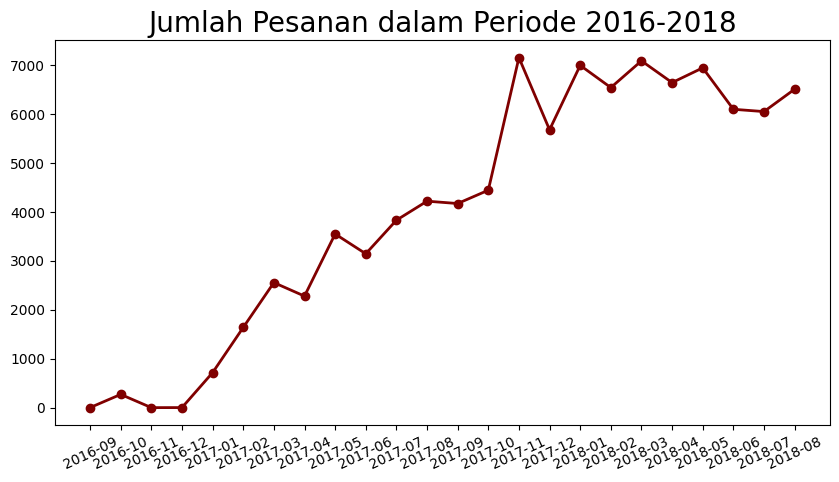

In [82]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="#800000"
)
plt.title("Jumlah Pesanan dalam Periode 2016-2018", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=25)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
Dari grafik di atas, peningkatan jumlah order tertinggi terjadi pada Oktober 2017 dan penurunan jumlah order tertinggi terjadi pada November 2017

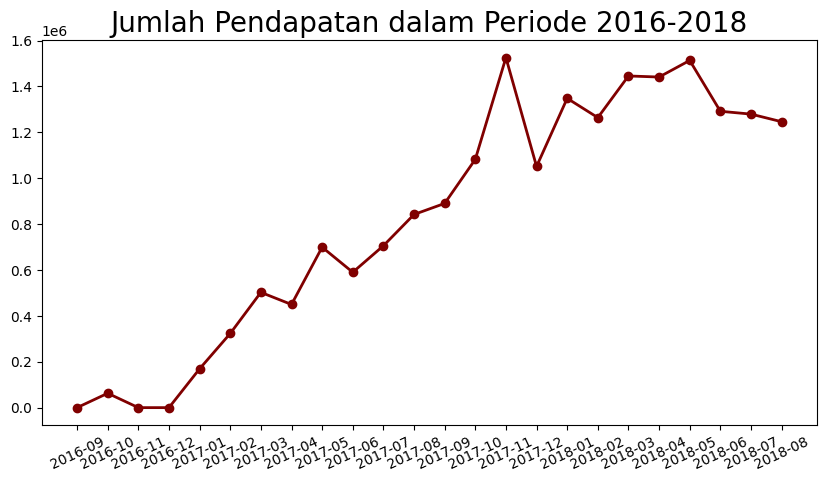

In [83]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_approved_at"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#800000"
)
plt.title("Jumlah Pendapatan dalam Periode 2016-2018", loc="center", fontsize=20)
plt.xticks(fontsize=10,rotation=25)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk apa yang paling banyak dan sedikit terjual?

In [84]:
sum_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
sum_order_items_df = sum_order_items_df.rename(columns={"product_id": "products"})
sum_order_items_df = sum_order_items_df.sort_values(by="products", ascending=False)
sum_order_items_df = sum_order_items_df.head(10)

sum_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11649
43,health_beauty,9764
65,sports_leisure,8732
39,furniture_decor,8553
15,computers_accessories,7897


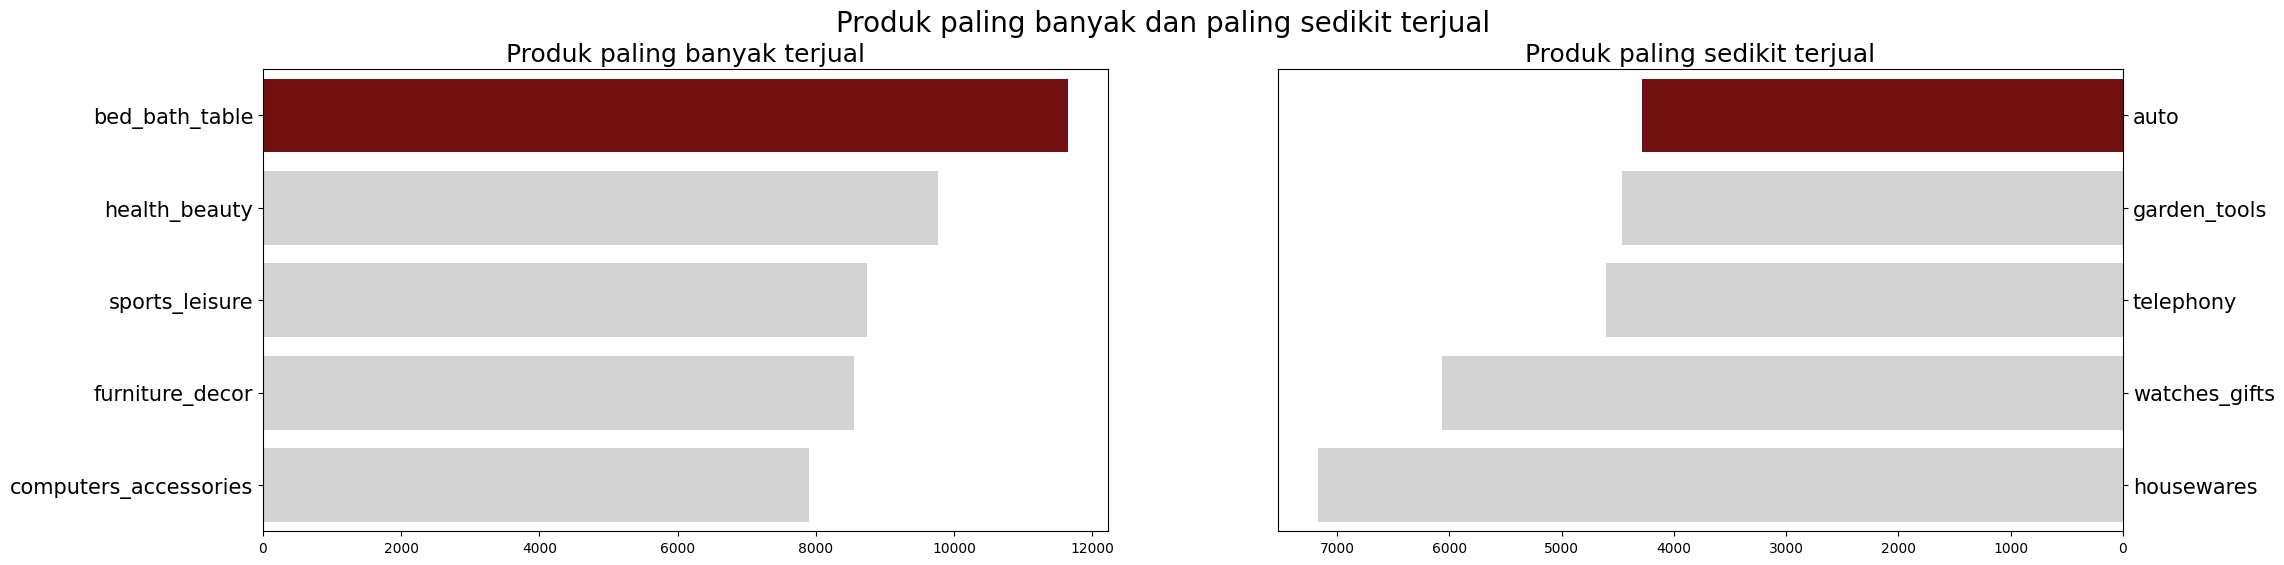

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#800000", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Apply fix: Use hue and legend=False to avoid the warnings
sns.barplot(x="products", y="product_category_name_english", hue="product_category_name_english", data=sum_order_items_df.head(5), palette=colors, dodge=False, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk paling banyak terjual", loc="center", fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

# Apply fix here as well
sns.barplot(x="products", y="product_category_name_english", hue="product_category_name_english", data=sum_order_items_df.sort_values(by="products", ascending=True).head(5), palette=colors, dodge=False, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk paling sedikit terjual", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Produk paling banyak dan paling sedikit terjual", fontsize=20)
plt.show()

**Insight:**
Produk yang paling banyak terjual yaitu bed bath table, sedangkan produk yang paling sedikit terjual yaitu auto

### Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?

Berdasarkan **customer_state**

In [87]:
cust_state_df = all_data.groupby(by="customer_state").customer_id.nunique().reset_index()
cust_state_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
cust_state_df.head()

,customer_state,customer_count
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256


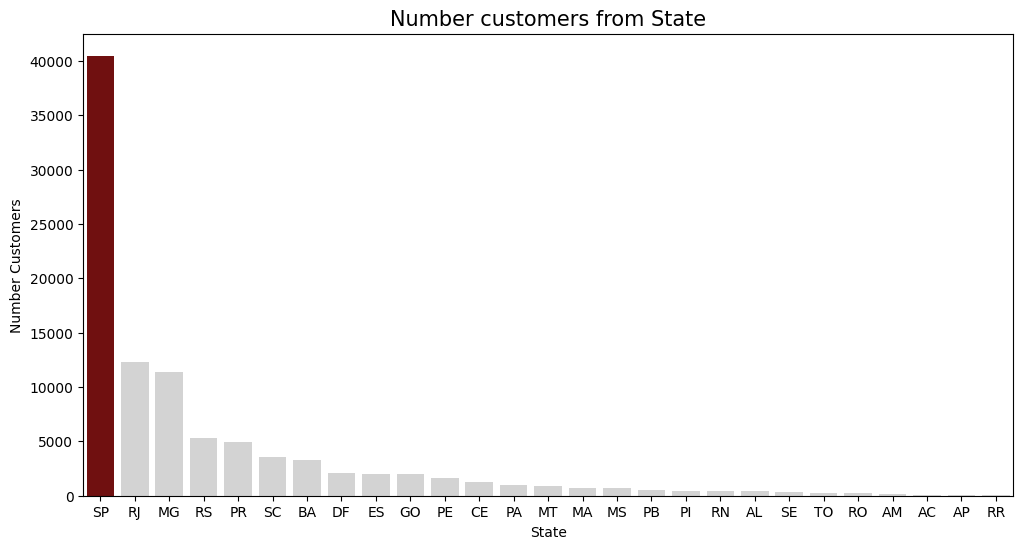

In [95]:
plt.figure(figsize=(12, 6))

most_common_state = cust_state_df.loc[cust_state_df['customer_count'].idxmax(), 'customer_state']

cust_state_df = cust_state_df.sort_values(by='customer_count', ascending=False)

# Apply fix: Use hue and legend=False
sns.barplot(x='customer_state', y='customer_count', data=cust_state_df,
            hue='customer_state',  # Assign x to hue
            palette=["#800000" if state == most_common_state else "#D3D3D3" for state in cust_state_df['customer_state']],
            dodge=False, legend=False  # Set legend=False
            )

plt.title("Number customers from State", fontsize=15)
plt.xlabel("State")
plt.ylabel("Number Customers")
plt.xticks(fontsize=10)
plt.show()

**Insight:**
Pelanggan terbanyak berada di **SP**

Berdasarkan **customer_city**

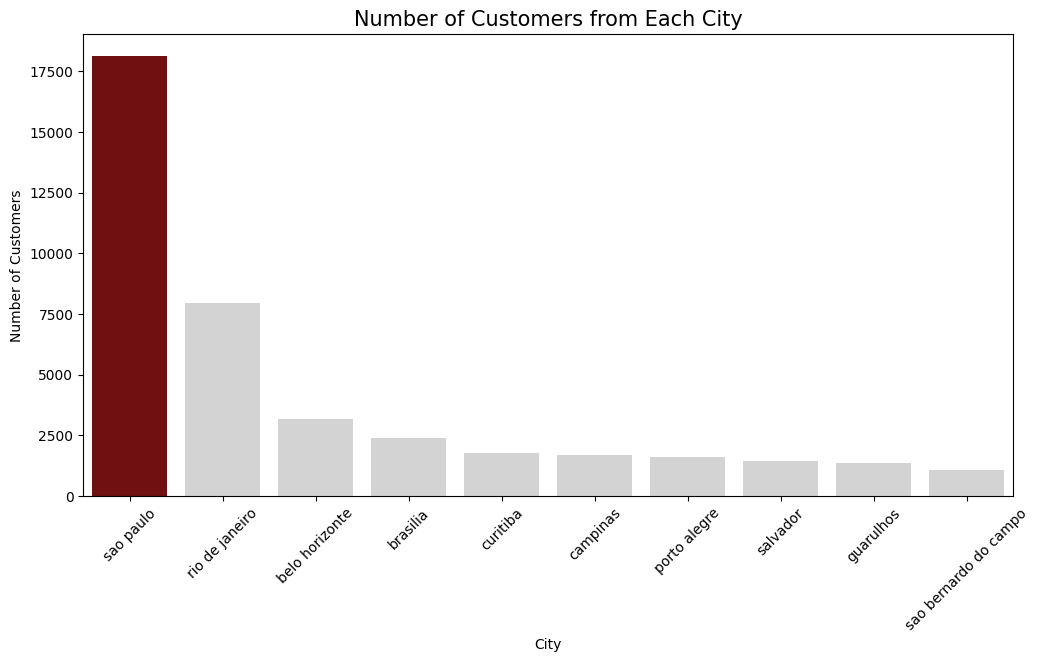

In [97]:
plt.figure(figsize=(12, 6))

most_common_city = cust_city_df.idxmax()

cust_city_df = cust_city_df.sort_values(ascending=False)

# Assign x to hue and set legend=False
sns.barplot(x=cust_city_df.index,
            y=cust_city_df.values,
            hue=cust_city_df.index,  # Use index as hue
            palette=["#800000" if city == most_common_city else "#D3D3D3" for city in cust_city_df.index],
            dodge=False, legend=False  # Set legend=False
            )

plt.title("Number of Customers from Each City", fontsize=15)
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, fontsize=10)
plt.show()

**Insight:**
Pelanggan terbanyak berada di **Sao Paulo**

##### Analisis Lanjutan (Opsional)

In [101]:
other_state_geoloc = geolocation_df.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
other_state_geoloc[other_state_geoloc['count']>= 2].shape
max_state = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [102]:
geoloc_silver = geolocation_df.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
geoloc_silver = geoloc_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [103]:
customers_silver = customers_df.merge(geoloc_silver,left_on='customer_zip_code_prefix',right_on='geolocation_zip_code_prefix',how='inner')

In [104]:
customers_silver.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,customer_unique_id,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaT,NaN,3149,sao paulo,SP,-23.576058,-46.587276
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaT,NaN,3149,são paulo,SP,-23.575573,-46.587384
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaT,NaN,3149,sao paulo,SP,-23.576058,-46.587276
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaT,NaN,3149,são paulo,SP,-23.575573,-46.587384
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaT,NaN,3149,sao paulo,SP,-23.576058,-46.587276


In [105]:
customers_silver.to_csv("geolocation.csv", index=False)

In [110]:
import urllib
import matplotlib.image as mpimg
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

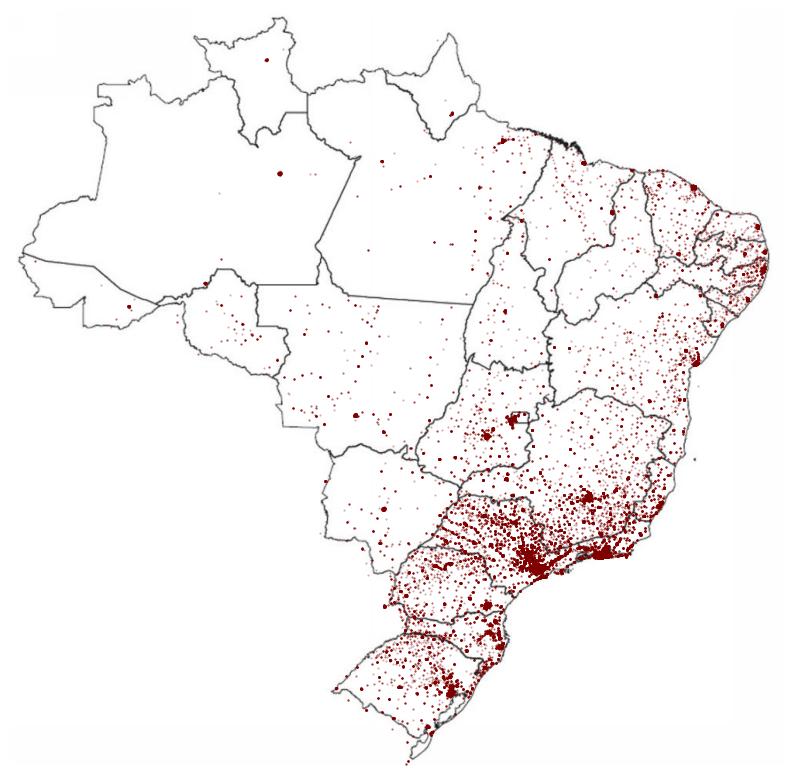

In [111]:
plot_brazil_map(customers_silver.drop_duplicates(subset='customer_unique_id'))

## Conclusion

- Conclusion pertanyaan 1:
  Bagaimana tren penjualan di platform e-commerce selama periode waktu tertentu?
  
  Jumlah pesanan dan pendapatan menunjukkan pertumbuhan yang signifikan dari akhir 2016 hingga mencapai puncaknya pada akhir 2017, di mana jumlah pesanan mendekati 7000 dan pendapatan mendekati 1,5 juta.

  Setelah puncak ini, meskipun ada sedikit penurunan, baik pesanan maupun pendapatan tetap berada pada level yang relatif tinggi dan stabil selama tahun 2018, dengan kisaran pesanan sekitar 5000-7000 dan pendapatan sekitar 1 juta.

- Conclusion pertanyaan 2:
  Produk apa yang paling banyak dan sedikit terjual?

  Produk yang paling banyak terjual yaitu bed bath table, sedangkan produk yang paling sedikit terjual yaitu auto
  

- Conclusion pertanyaan 3:
  Bagaimana demografi pelanggan yang kita miliki?

  Berdasarkan visualisasi data yang sudah dibuat, dapat diketahui bahwa pelanggan yang kita miliki paling banyak berasal dari SP berdasarkan Customer State dan Sao Paulo berdasarkan Each City. Persebaran pelanggan lebih banyak berada di bagian tenggara dan selatan, seperti Sao Paulo, Rio de Janeiro, Porto Alegre, dan lainnya.